<a href="https://colab.research.google.com/github/SwathiMenon/Natural-Language-Processing/blob/main/Movie_Review_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim : To Indicate whether a particular review sentiment can be classified as Positive (1) OR Negative(0)



In today's digital age, the entertainment industry has witnessed an exponential growth in the volume of content being generated and consumed. With a vast array of movies released each year, audiences face the challenge of selecting films that resonate with their preferences and expectations. As a result, the ability to quickly and accurately assess movie reviews for their sentiment, whether positive or negative, has become crucial for both moviegoers and filmmakers alike.



Natural Language Processing (NLP) has emerged as a revolutionary technology that enables machines to comprehend, interpret, and process human language. Leveraging the power of NLP, this project sets out to develop a robust and efficient sentiment analysis model specifically designed for movie reviews. The main objective is to automatically classify these reviews as positive or negative, providing valuable insights into audience reactions and overall movie sentiment.

data set:https://www.kaggle.com/datasets/thedevastator/unlocking-the-human-perspective-on-movie-reviews






In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:

df_train=pd.read_csv("/content/drive/MyDrive/NLP/train.csv",encoding="ISO-8859-1")
df_train

,review,label,evidences
0,"plot : two teen couples go to a church party ,...",0,['mind - fuck movie' 'the sad part is'\n 'down...
1,the happy bastard 's quick movie review damn\n...,0,"[""it 's pretty much a sunken ship"" 'sutherland..."
2,it is movies like these that make a jaded movi...,0,['the characters and acting is nothing spectac...
3,""" quest for camelot "" is warner bros . '\nfirs...",0,['dead on arrival' 'the characters stink'\n 's...
4,synopsis : a mentally unstable man undergoing ...,0,['it is highly derivative and somewhat boring'...
...,...,...,...
1595,"the central focus of michael winterbottom 's ""...",1,['emerging as the definite face of independent...
1596,"after the average mouse hunt , the silly small...",1,"['a visual and aural treat , backed up with a ..."
1597,i have seen several ( but not that many )\nwoo...,1,['this movie is so infectious . and funny ! an...
1598,fritz lang 's first american film since leavin...,1,['powerfully done' 'an eye - opener']


In [4]:
df_test=pd.read_csv("/content/drive/MyDrive/NLP/test.csv",encoding="ISO-8859-1")
df_test

,review,label,evidences
0,there may not be a critic alive who harbors as...,0,['i even giggled'\n 'something about these fil...
1,"renee zellweger stars as sonia , a young jewis...",0,"['rings' 'improbably'\n ""who does an adequate ..."
2,there 're so many things to criticize about i ...,0,"[""there 're so many things to criticize about ..."
3,do n't let this movie fool you into believing ...,0,"[""do n't let this movie fool you into believin..."
4,it 's a good thing most animated sci - fi movi...,0,"[""is proof that hollywood does n't have a clue..."
...,...,...,...
194,wow !\nwhat a movie .\nit 's everything a movi...,1,"[""wow ! what a movie . it 's everything a movi..."
195,"richard gere can be a commanding actor , but\n...",1,['everything comes together'\n 'gere is except...
196,"glory -- starring matthew broderick , denzel w...",1,['is the true story of the 54th regiment of'\n...
197,steven spielberg 's second epic film on world ...,1,"['is an unquestioned masterpiece of'\n ""manage..."


**PREPROCESSING**

In [5]:
df=pd.concat([df_train,df_test],axis=0,ignore_index=True)
df

,review,label,evidences
0,"plot : two teen couples go to a church party ,...",0,['mind - fuck movie' 'the sad part is'\n 'down...
1,the happy bastard 's quick movie review damn\n...,0,"[""it 's pretty much a sunken ship"" 'sutherland..."
2,it is movies like these that make a jaded movi...,0,['the characters and acting is nothing spectac...
3,""" quest for camelot "" is warner bros . '\nfirs...",0,['dead on arrival' 'the characters stink'\n 's...
4,synopsis : a mentally unstable man undergoing ...,0,['it is highly derivative and somewhat boring'...
...,...,...,...
1794,wow !\nwhat a movie .\nit 's everything a movi...,1,"[""wow ! what a movie . it 's everything a movi..."
1795,"richard gere can be a commanding actor , but\n...",1,['everything comes together'\n 'gere is except...
1796,"glory -- starring matthew broderick , denzel w...",1,['is the true story of the 54th regiment of'\n...
1797,steven spielberg 's second epic film on world ...,1,"['is an unquestioned masterpiece of'\n ""manage..."


In [6]:
df.dtypes

review       object
label         int64
evidences    object
dtype: object

In [7]:
df.drop(["evidences"],inplace=True,axis=1)

In [8]:
df

,review,label
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard 's quick movie review damn\n...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . '\nfirs...",0
4,synopsis : a mentally unstable man undergoing ...,0
...,...,...
1794,wow !\nwhat a movie .\nit 's everything a movi...,1
1795,"richard gere can be a commanding actor , but\n...",1
1796,"glory -- starring matthew broderick , denzel w...",1
1797,steven spielberg 's second epic film on world ...,1


In [9]:
df["label"].unique()

array([0, 1])

In [10]:
msg=df.review
msg

0       plot : two teen couples go to a church party ,...
1       the happy bastard 's quick movie review damn\n...
2       it is movies like these that make a jaded movi...
3       " quest for camelot " is warner bros . '\nfirs...
4       synopsis : a mentally unstable man undergoing ...
                              ...                        
1794    wow !\nwhat a movie .\nit 's everything a movi...
1795    richard gere can be a commanding actor , but\n...
1796    glory -- starring matthew broderick , denzel w...
1797    steven spielberg 's second epic film on world ...
1798    truman ( " true - man " ) burbank is the perfe...
Name: review, Length: 1799, dtype: object

**REMOVING SPECIAL CHARECTERS**

In [11]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

<ipython-input-11-53af49f42db0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+'," ")


0       plot two teen couples go to a church party dri...
1       the happy bastard s quick movie review damn th...
2       it is movies like these that make a jaded movi...
3        quest for camelot is warner bros first featur...
4       synopsis a mentally unstable man undergoing ps...
                              ...                        
1794    wow what a movie it s everything a movie can b...
1795    richard gere can be a commanding actor but he ...
1796    glory starring matthew broderick denzel washin...
1797    steven spielberg s second epic film on world w...
1798    truman true man burbank is the perfect name fo...
Name: review, Length: 1799, dtype: object

 **CREATING A WORD CLOUD**

In [12]:
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df['review'].values)

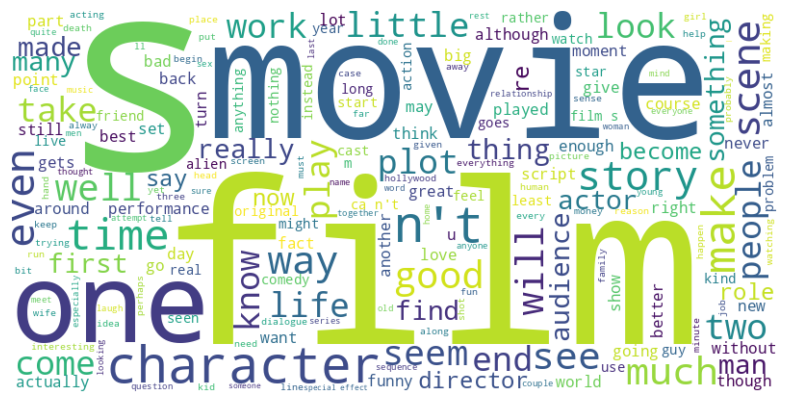

In [13]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**STEMMING AND TOKENISING**

In [14]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
stemmer=PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))

In [16]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

**VECTORIZATION**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(msg)
print(data_vec)

  (0, 6491)	0.05316195940843356
  (0, 20535)	0.05284448969452909
  (0, 18461)	0.06391977431631499
  (0, 4911)	0.10507244661863903
  (0, 23966)	0.04895802759851696
  (0, 2300)	0.051661666723816245
  (0, 20638)	0.037642905550690074
  (0, 6680)	0.06484509207525334
  (0, 11292)	0.05611441902012206
  (0, 23754)	0.018752050195311898
  (0, 19591)	0.04895802759851696
  (0, 23737)	0.039433058305970145
  (0, 7085)	0.023798553195265845
  (0, 19223)	0.057968570638425324
  (0, 19527)	0.03343133460127163
  (0, 599)	0.03650748731958825
  (0, 24210)	0.017923289303606253
  (0, 16774)	0.028936224486881636
  (0, 24098)	0.04680429432038939
  (0, 784)	0.017308278480719884
  (0, 11658)	0.029547958680558515
  (0, 10118)	0.04007223021943394
  (0, 8525)	0.0338423788365965
  (0, 1354)	0.04322609860958683
  (0, 19953)	0.029547958680558515
  :	:
  (1798, 7080)	0.008291926068929076
  (1798, 21555)	0.01835296914051816
  (1798, 10360)	0.0304330506693342
  (1798, 21500)	0.05920256473859258
  (1798, 7974)	0.0543591417

In [19]:
y=df['label'].values
y

array([0, 0, 0, ..., 1, 1, 1])

TRAIN TEST SPLIT

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)


**MODEL CREATION**

In [21]:
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
sv=SVC()
# nb=GaussianNB()
rf=RandomForestClassifier()
ab= AdaBoostClassifier()
models=[sv,rf,ab]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  y_new=model.predict(tf.transform(["wow !\nwhat a movie .\nit 's everything a movi "]))
  print(classification_report(y_test,y_pred))



SVC()
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       268
           1       0.82      0.83      0.82       272

    accuracy                           0.82       540
   macro avg       0.82      0.82      0.82       540
weighted avg       0.82      0.82      0.82       540

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       268
           1       0.80      0.77      0.79       272

    accuracy                           0.79       540
   macro avg       0.79      0.79      0.79       540
weighted avg       0.79      0.79      0.79       540

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       268
           1       0.71      0.75      0.73       272

    accuracy                           0.72       540
   macro avg       0.72      0.72      0.72       540
weighted avg       0.7

BY CONCIDERING A POSITIVE VALUE FOR CHECKING....WE GET

In [24]:
if y_new==1:
    print("positive")
if y_new==0:
    print("negative")

positive
